In [1]:
import sys

sys.path.append("..")

In [2]:
from qurious.environments import GridWorld

env = GridWorld(
    width=5, height=5, start_pos=(0, 0), goal_pos=[(4, 4)], obstacles=[(3, 1), (2, 2), (1, 3)], step_penalty=0.1
)

print(env.render())

A . . . .
. . . # .
. . # . .
. # . . .
. . . . G



In [3]:
# create agent with e-greedy policy

from qurious.agents import SarsaAgent
from qurious.policy import DeterministicTabularPolicy, EpsilonGreedyPolicy
from qurious.value_fns import TabularActionValueFunction

# Create agent components
n_states = env.get_num_states()
n_actions = env.get_num_actions()

# Q-function
q_function = TabularActionValueFunction(n_states, n_actions)

# Base policy (will be updated based on Q-values)
base_policy = DeterministicTabularPolicy(n_states, n_actions)

# Epsilon-greedy exploration policy
epsilon = 0.5
policy = EpsilonGreedyPolicy(base_policy, epsilon, decay_rate=0.99)

# Create agent
agent = SarsaAgent(policy, q_function, gamma=0.99)
agent.enable_experience_tracking()

A . . . .
. . . # .
. . # . .
. # . . .
. . . . G



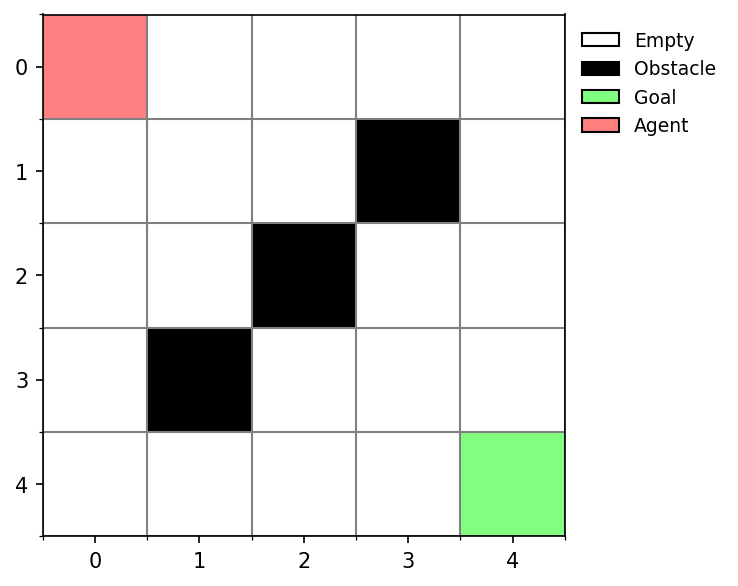

In [9]:
# create visualization

from qurious.visualization import GridWorldVisualizer, AgentLayer, GridLayer

viz = GridWorldVisualizer(env, theme="light")
viz.add_layer(GridLayer())
viz.add_layer(AgentLayer())
fig, ax = viz.render_matplotlib()

print(viz.render_ascii())


In [ ]:
from qurious.utils import train_agent, clear_output
from qurious.visualization import PolicyLayer
from time import sleep

viz.add_layer(PolicyLayer(agent.policy, show_text=False))


def step_callback(*args, **kwargs):
    clear_output()
    viz.render_matplotlib(fig=fig, ax=ax)
    sleep(0.1)


train_agent(env, agent, num_episodes=1000, step_callback=step_callback)


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>